In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import measure
from scipy import ndimage
from skimage import feature
from skimage import morphology
from skimage import segmentation


(3272, 1883) 1.6230667651759988e-07 1.0


Text(0.5, 1.0, 'histogram of gray values')

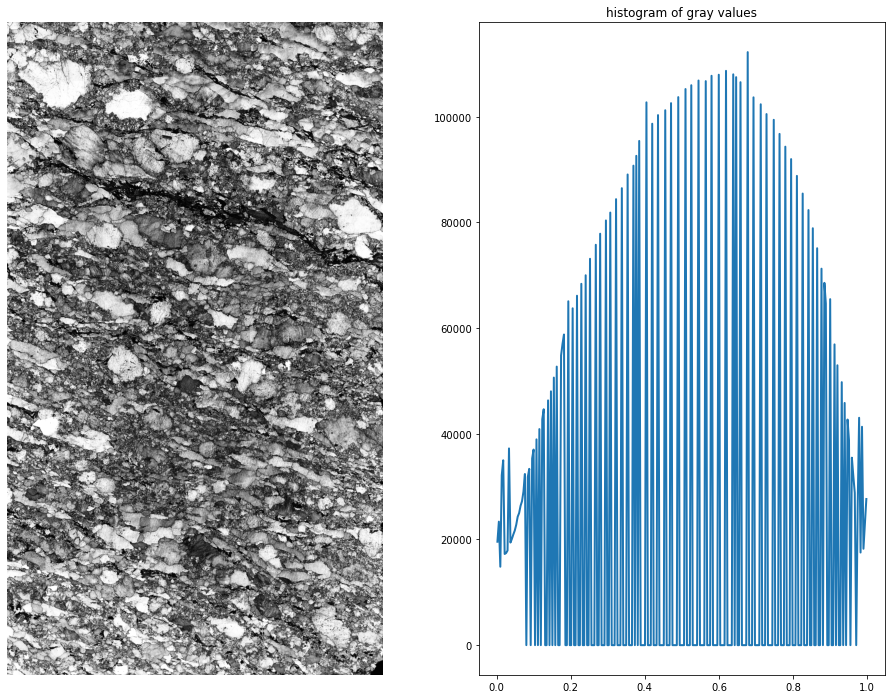

In [2]:
# import cropped band contrast image
band_contrast_raw = io.imread('../images/cropped_band_image.png', as_gray=True)

# equalize histogram of band contrast image
band_eq = exposure.equalize_hist(band_contrast_raw)
print(band_eq.shape, band_eq.min(), band_eq.max())

# display image and hist stats
hist, hist_centers = exposure.histogram(band_eq)

fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs[0].imshow(band_eq, cmap=plt.cm.gray)
axs[0].axis('off')
axs[1].plot(hist_centers, hist, lw=2)
axs[1].set_title('histogram of gray values')

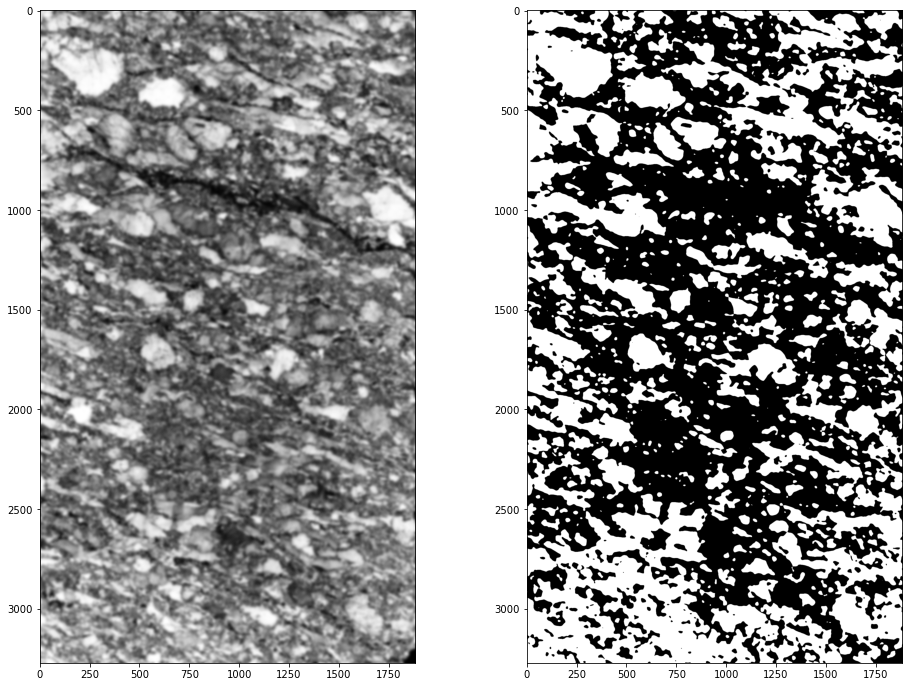

In [3]:
# filter equalized band contrast image to extract blobs
# TODO play with sigma value and threshold for blobs
filtered = filters.gaussian(band_eq, sigma=(512 / (4.0 * 20)))
blobs = filtered > filtered.mean()

# show filtered image and detected blobs
fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs[0].imshow(filtered, cmap='gray')
axs[1].imshow(blobs, cmap='gray')

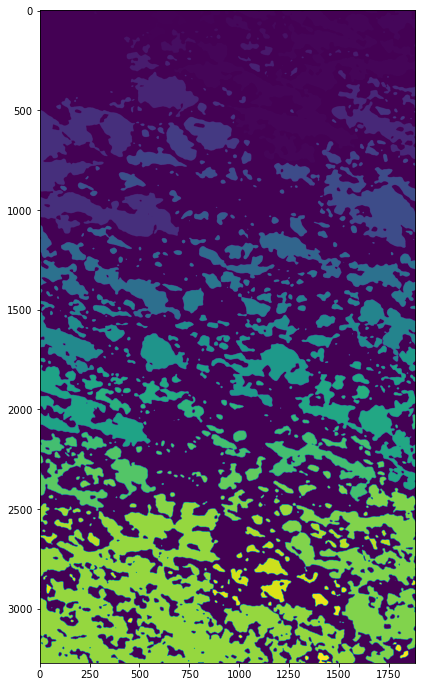

In [4]:
# label components
# label only foreground connected components
blob_labels = measure.label(blobs, background=0)

# show us your labels
fig, axs = plt.subplots(1, figsize=(16, 12))
axs.imshow(blob_labels)

(3272, 1883) float64 0.0 112.8007092176286


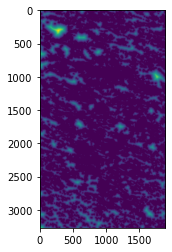

In [5]:
distance = ndimage.distance_transform_edt(blobs)
print(distance.shape, distance.dtype, distance.min(), distance.max())
plt.imshow(distance)

In [6]:
# ?peak_local_max

/tmp/ipykernel_5533/1968042688.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = feature.peak_local_max(distance, indices = False, footprint=np.ones((3, 3)), labels=blobs)


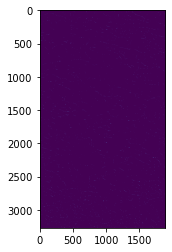

In [7]:
local_maxi = feature.peak_local_max(distance, indices = False, footprint=np.ones((3, 3)), labels=blobs)
local_maxi
plt.imshow(local_maxi)

In [8]:
#?skimage.morphology.label
markers = morphology.label(local_maxi)
markers

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0, 7886,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)

(3272, 1883) 7919


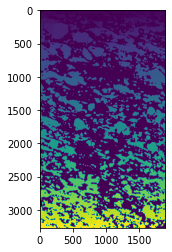

In [9]:
labels_ws = segmentation.watershed(-distance, markers, mask=blobs)
print(labels_ws.shape, labels_ws.max())
plt.imshow(labels_ws)

(3272, 1883) 1.6230667651759988e-07 1.0


Text(0.5, 1.0, 'histogram of gray values')

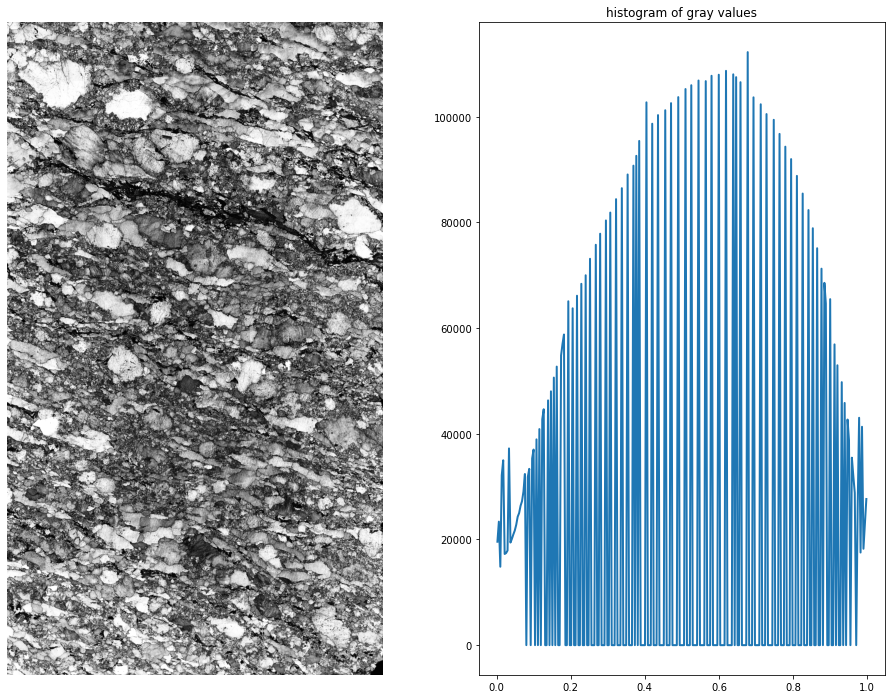

In [10]:
# import cropped band contrast image
band_contrast_raw = io.imread('../images/cropped_band_image.png', as_gray=True)

# equalize histogram of band contrast image
band_eq = exposure.equalize_hist(band_contrast_raw)
print(band_eq.shape, band_eq.min(), band_eq.max())

# display image and hist stats
hist, hist_centers = exposure.histogram(band_eq)

fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs[0].imshow(band_eq, cmap=plt.cm.gray)
axs[0].axis('off')
axs[1].plot(hist_centers, hist, lw=2)
axs[1].set_title('histogram of gray values')

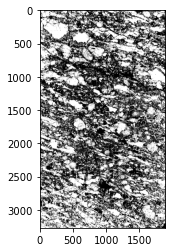

In [11]:
thresh = filters.threshold_otsu(band_eq)
mask = band_eq > thresh

# TODO increase fig size
plt.imshow(mask, cmap='gray')


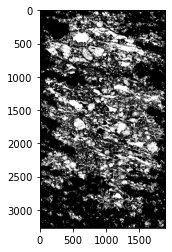

In [12]:
clean_border = segmentation.clear_border(mask)
plt.imshow(clean_border, cmap='gray')

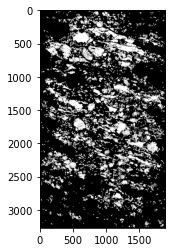

In [13]:
remove_small = morphology.remove_small_objects(clean_border)
plt.imshow(remove_small, cmap='gray')

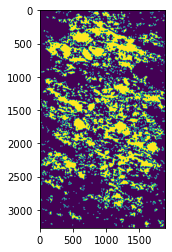

In [14]:
closed = morphology.closing(remove_small, morphology.square(8))
plt.imshow(closed)

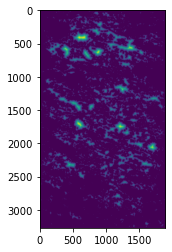

In [15]:
distance = ndimage.distance_transform_edt(closed)
plt.imshow(distance)

/tmp/ipykernel_5533/2227792914.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((15, 15)), labels=closed)


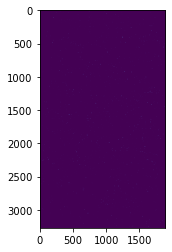

In [16]:
local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((15, 15)), labels=closed)
plt.imshow(local_maxi)

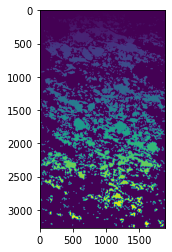

In [17]:
markers = morphology.label(local_maxi)
labels_ws = segmentation.watershed(-distance, markers, mask=closed)
plt.imshow(labels_ws)